In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('questions.csv')

In [6]:
df.shape

(404350, 6)

In [7]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
new_df = df.sample(30000,random_state=2)

In [9]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
302475,302476,594005,594006,What are you most thankful for this year?,What are you most thankful for this Thanksgivi...,0
369855,369856,723785,723786,Why do I get headaches after running outside i...,What should I do when I get a cold and a heada...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54204,107863,107864,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1
132566,132567,262555,262556,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...,1


In [11]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
new_df.duplicated().sum()

0

is_duplicate
0    18965
1    11035
Name: count, dtype: int64
is_duplicate
0    63.216667
1    36.783333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

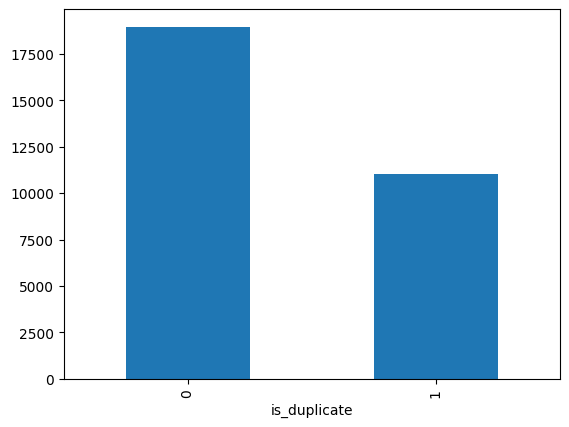

In [13]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [14]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59803
Number of questions getting repeated 175


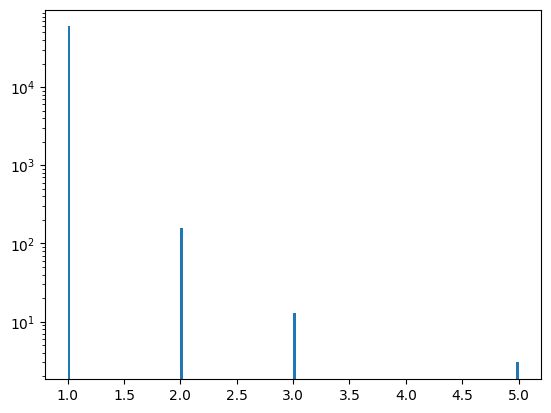

In [15]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [16]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
302475,302476,594005,594006,What are you most thankful for this year?,What are you most thankful for this Thanksgivi...,0,41,54
369855,369856,723785,723786,Why do I get headaches after running outside i...,What should I do when I get a cold and a heada...,0,61,50
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54204,107863,107864,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1,104,106
132566,132567,262555,262556,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...,1,71,84


In [18]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
302475,302476,594005,594006,What are you most thankful for this year?,What are you most thankful for this Thanksgivi...,0,41,54,8,9
369855,369856,723785,723786,Why do I get headaches after running outside i...,What should I do when I get a cold and a heada...,0,61,50,11,12
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54204,107863,107864,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1,104,106,19,19
132566,132567,262555,262556,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...,1,71,84,12,14


In [19]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [20]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
302475,302476,594005,594006,What are you most thankful for this year?,What are you most thankful for this Thanksgivi...,0,41,54,8,9,7
369855,369856,723785,723786,Why do I get headaches after running outside i...,What should I do when I get a cold and a heada...,0,61,50,11,12,4
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54204,107863,107864,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1,104,106,19,19,14
132566,132567,262555,262556,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...,1,71,84,12,14,6


In [21]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [22]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
302475,302476,594005,594006,What are you most thankful for this year?,What are you most thankful for this Thanksgivi...,0,41,54,8,9,7,17
369855,369856,723785,723786,Why do I get headaches after running outside i...,What should I do when I get a cold and a heada...,0,61,50,11,12,4,21
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54204,107863,107864,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1,104,106,19,19,14,32
132566,132567,262555,262556,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...,1,71,84,12,14,6,26


In [23]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
302475,302476,594005,594006,What are you most thankful for this year?,What are you most thankful for this Thanksgivi...,0,41,54,8,9,7,17,0.41
369855,369856,723785,723786,Why do I get headaches after running outside i...,What should I do when I get a cold and a heada...,0,61,50,11,12,4,21,0.19
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54204,107863,107864,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1,104,106,19,19,14,32,0.44
132566,132567,262555,262556,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...,1,71,84,12,14,6,26,0.23


minimum characters 1
maximum characters 430
average num of characters 59


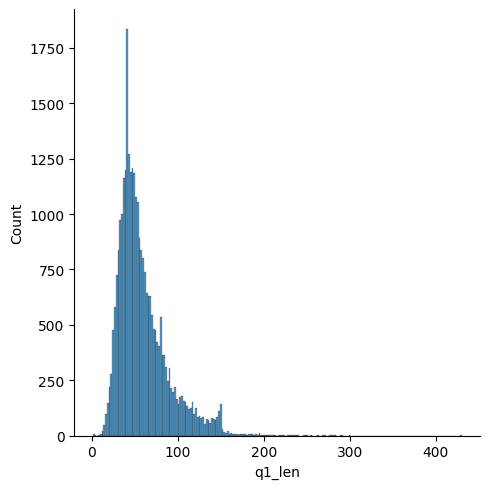

In [24]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 5
maximum characters 1151
average num of characters 59


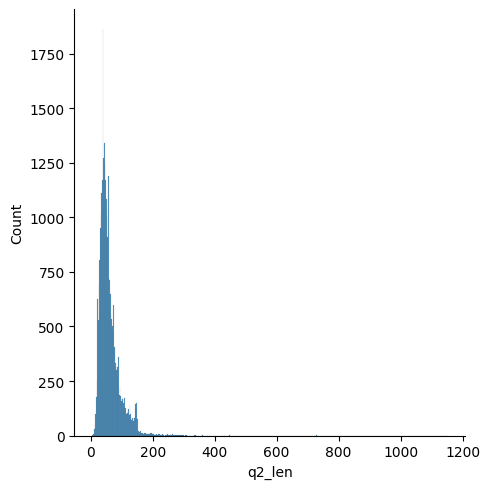

In [25]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 81
average num of words 10


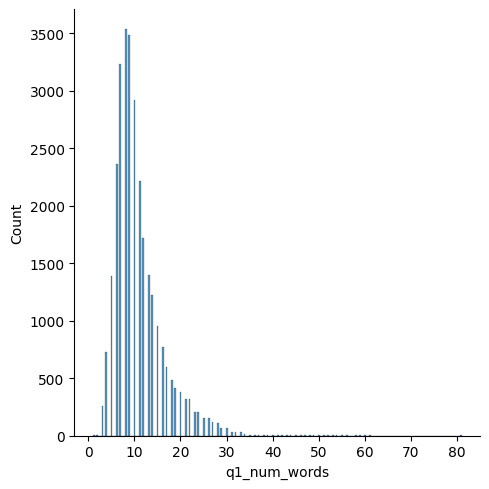

In [26]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


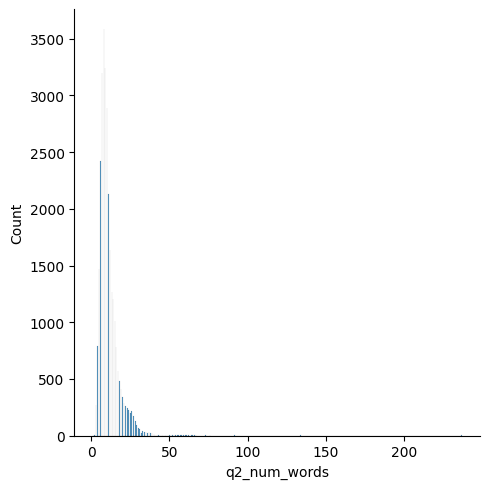

In [27]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

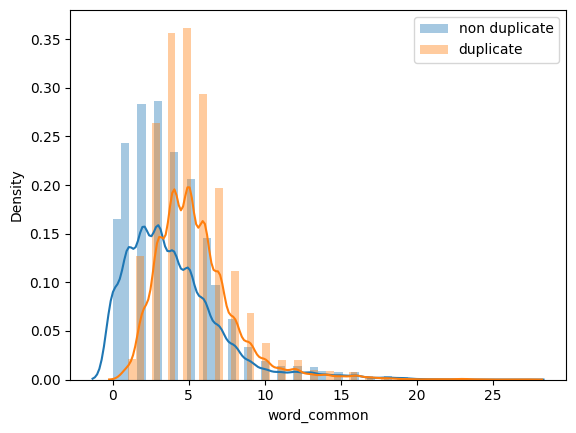

In [28]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

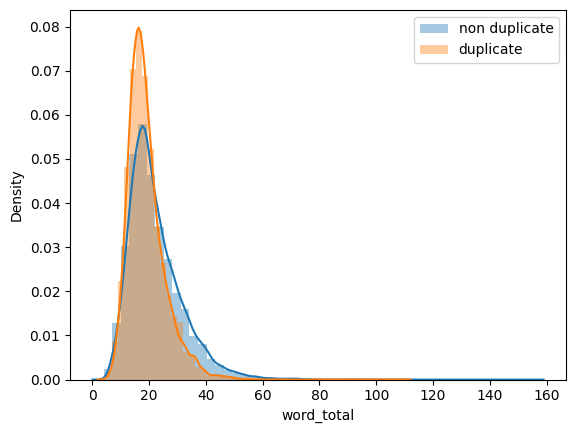

In [29]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

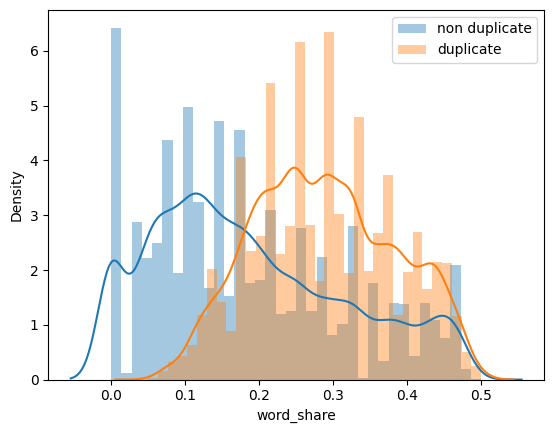

In [30]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [31]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
302475,What are you most thankful for this year?,What are you most thankful for this Thanksgivi...
369855,Why do I get headaches after running outside i...,What should I do when I get a cold and a heada...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem..."
132566,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...


In [32]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
302475,0,41,54,8,9,7,17,0.41
369855,0,61,50,11,12,4,21,0.19
4665,0,125,124,24,24,20,42,0.48
54203,1,104,106,19,19,14,32,0.44
132566,1,71,84,12,14,6,26,0.23


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [34]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [35]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
302475,0,41,54,8,9,7,17,0.41,0,0,...,0,0,1,0,0,0,0,0,0,0
369855,0,61,50,11,12,4,21,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,104,106,19,19,14,32,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,1,71,84,12,14,6,26,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7591666666666667

In [48]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7593333333333333

## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy